# Biais et Attaques Adversariales en Deep Learning


## 1. Introduction



L’Intelligence Artificielle (IA) a révolutionné les processus de prise de décision dans divers domaines tels que la santé, la finance ou encore l’éducation. Cependant, deux défis majeurs se présentent lors de l’implémentation de modèles dans le monde réel :

1. Le Biais : Les modèles peuvent perpétuer ou amplifier les biais sociaux et historiques présents dans les données d’entraînement ou introduits par les concepteurs.

2. Les Attaques Adversariales : Les modèles peuvent être vulnérables à des perturbations imperceptibles qui les induisent en erreur.

Ce notebook constitue une ressource sur ces deux aspects importants. Nous étudierons d’abord les formes de biais en IA, la façon de les détecter et de les atténuer. Ensuite, nous présenterons les attaques adversariales à travers un exemple pratique, et nous conclurons avec différentes stratégies pour défendre nos modèles contre ces attaques.

## 2. Comprendre le Biais en IA


Un biais survient lorsqu’un modèle statistique ou d’apprentissage induit des prédictions qui désavantagent systématiquement certains groupes ou individus. Les jeux de données reflétant souvent des déséquilibres sociaux ou culturels existants, il est essentiel de surveiller l’équité et la responsabilité des systèmes d’IA.


### 2.1 Types de Biais
Ci-dessous, quatre types courants de biais retrouvés dans les systèmes IA :

1 - Biais de Sélection

Définition : Survient lorsque le dataset utilisé pour l’entraînement n’est pas représentatif de la population réelle.

Exemple : Un système de reconnaissance faciale entraîné majoritairement sur des visages à peau claire fonctionnera mal sur des visages à peau foncée.

Importance : Un modèle ne “voit” pas suffisamment certains sous-groupes et apprend des caractéristiques biaisées en faveur des groupes majoritaires.

2 - Biais de Mesure

Définition : Apparaît quand les variables (features) ou les labels sont mesurés ou collectés de manière incorrecte, pénalisant systématiquement certains groupes.

Exemple : Dans un dataset médical, si certains tests ne sont pas également effectués sur l’ensemble des patients, le diagnostic pour un groupe peut être faussé.

Importance : Une mauvaise qualité de mesure mène à des relations erronées apprises par le modèle, aggravant le risque de discrimination.

3 - Biais Algorithmique

Définition : Même avec des données relativement équilibrées, l’algorithme lui-même peut introduire des biais via sa fonction objectif ou ses mécanismes d’optimisation.

Exemple : Un modèle fortement régularisé peut simplifier excessivement les données, ignorant les signaux importants pour un groupe minoritaire.

Importance : En cherchant à maximiser l’exactitude globale, le modèle peut délaisser la performance pour les groupes les moins représentés.

4 - Biais de Confirmation

Définition : Tendance à interpréter les nouvelles informations de manière à confirmer des croyances préexistantes. En IA, cela survient lorsque les concepteurs choisissent ou ajustent des variables pour renforcer leurs hypothèses initiales.

Exemple : Un système de recommandation se concentrant exclusivement sur les articles populaires va continuellement promouvoir ces articles et négliger des intérêts plus variés ou minoritaires.

Importance : Peut créer des boucles de rétroaction où certains résultats (souvent alignés sur la majorité) se renforcent en continu.


### 2.2 Détection du Biais

Détecter un biais peut être plus complexe que de mesurer une simple précision globale. Voici quelques indicateurs et approches :

1. Métriques par Groupe

On compare l’exactitude, la précision, le rappel ou le F1-score pour différents groupes démographiques (genre, ethnie, âge, etc.).

Exemple : Si le Taux de Vrais Positifs (TPR) est de 90 % pour le “Groupe A” mais seulement 70 % pour le “Groupe B”, un problème d’équité peut exister.

2. Parité Statistique

Vise à avoir la même proportion de prédictions positives pour chaque groupe.

Exemple : Si 50 % des hommes sont prédits positifs pour un modèle d’embauche, on souhaiterait également 50 % pour les femmes.

Limite : Une parité stricte peut entrer en conflit avec l’exactitude si des différences réelles existent dans les données.

3. Égalité des Chances (Equal Opportunity)

Exige que le Taux de Vrais Positifs (TPR) soit identique entre les groupes.

Pourquoi ? : Si le modèle échoue plus souvent pour un groupe, celui-ci est défavorisé.


### 2.3 Atténuation du Biais

La réduction du biais peut s’effectuer avant, pendant ou après l’entraînement du modèle :

1. Interventions sur les Données

- Ré-échantillonnage : Sur-échantillonner les groupes minoritaires ou sous-échantillonner les groupes majoritaires pour équilibrer les données.
- Augmentation de Données : Générer des exemples synthétiques afin de mieux représenter les groupes sous-représentés.

2. Interventions Algorithmiques

- Régularisation pour l’Équité : Ajouter une pénalité dans la fonction de coût qui mesure la disparité entre les groupes (ex. pénaliser les écarts de TPR).
- Dé-biaisage Adversarial : Entraîner un modèle pour prédire la cible tout en l’empêchant de deviner l’attribut sensible (ex. utilisation d’un discriminateur).

3. Post-traitement

- Ajustement du Seuil de Décision : Utiliser un seuil différent pour chaque groupe afin d’atteindre une certaine parité de prédictions positives.
- Option de Rejet : Pour les cas limites, exiger une vérification manuelle ou un examen approfondi avant de valider la décision automatisée.

4. Gouvernance et Suivi

- La détection et la réduction du biais est un processus continu. Une fois déployé, le modèle doit être surveillé et réévalué régulièrement.

## 3. Exemple de Détection du Biais

Imaginons un dataset de demandes de prêt où chaque ligne contient :

- Groupe démographique (ex. attribut binaire : protégé ou non-protégé)
- Revenu
- Score de crédit
- Approbation de prêt (label binaire)

**Étapes pour Vérifier le Biais :**

1 - Partition du dataset

Séparer le dataset selon le groupe démographique (protégé vs non-protégé).

2 - Entraîner un Classifieur

Par exemple, un réseau de neurones ou une régression logistique pour prédire l’approbation du prêt à partir du revenu et du score de crédit.

3 - Évaluer des Métriques par Groupe

Calculer l’exactitude, la précision, le rappel pour le groupe protégé vs non-protégé.

Comparer le pourcentage d’approbations entre les deux groupes.

4 - Interpréter les Résultats

Si un écart important est observé (par ex. un groupe a un taux d’approbation nettement plus bas), c’est un signe possible de biais.

Il peut être nécessaire de modifier le dataset (ré-échantillonnage), le modèle (perte pénalisant le biais) ou le seuil de décision.

**Idée Clé :** Même avec une grande précision globale, le modèle peut discriminer contre certains groupes. Il est donc primordial de mesurer la performance selon les attributs démographiques.



## Attaques Adversariales en Deep Learning

### 4.1 Qu’est-ce qu’une Attaque Adversariale ?

Une attaque adversariale est une perturbation subtile et intentionnelle appliquée à une entrée (image, texte, etc.) pour tromper un modèle, qui va alors produire une prédiction incorrecte. Ces perturbations peuvent être quasi invisibles pour l’humain, mais bouleversent la sortie du modèle.

Dans cet exemple, nous illustrons un Fast Gradient Sign Method (FGSM), c’est-à-dire une attaque par perturbation adversariale sur un réseau de neurones (ici, un modèle AlexNet). L’idée est de modifier légèrement les pixels d’une image afin de tromper le réseau de neurones. Même si l’image modifiée (adversariale) reste très proche visuellement de l’originale, le modèle peut se tromper de classe de façon spectaculaire.

Nous allons :

- Télécharger une image de Siamois (un chat siamois).
- L’analyser à l’aide d’AlexNet pour voir la prédiction initiale.
- Appliquer l’attaque FGSM pour générer une image adversariale.
- Vérifier si la prédiction du réseau a changé.

In [ ]:
# --- Installation et importation des bibliothèques en Python ---

# Installation de la toolbox ART pour les attaques adversariales
!pip install adversarial-robustness-toolbox --quiet

# Importations Python
import requests
from io import BytesIO
from PIL import Image
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# Importations spécifiques à ART
from art.estimators.classification import PyTorchClassifier
from art.attacks.evasion import FastGradientMethod

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.8 MB/s eta 0:00:00


- Nous installons (si nécessaire) `adversarial-robustness-toolbox` et importons tous les modules dont nous avons besoin.
- `requests` servira à télécharger l’image depuis Internet.
- `PIL` pour manipuler les images,
- `torch` et `torchvision` pour le modèle AlexNet.
- `matplotlib` pour l’affichage.
- Les classes d’`art` pour la création du classifieur PyTorch et l’attaque FGSM.

In [ ]:
# --- Téléchargement et préparation de l'image ---

# On télécharge une image de chat siamois depuis internet
url = "https://www.cozycatfurniture.com/image/cache/siamese-cat-cover-1054x791.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert("RGB")

# On redimensionne/cadre l'image au format 224x224 et on la convertit en tenseur [0,1]
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),  # Intervalle [0,1]
])
x = transform(img).unsqueeze(0).numpy()  # Forme [1, 3, 224, 224]

Nous convertissons l’image en tenseur PyTorch et la limitons à la plage [0,1].

unsqueeze(0) ajoute une dimension pour en faire un lot (batch) de taille 1.

In [ ]:
# --- Chargement du modèle AlexNet et création du classifieur ART ---

# 1) On charge le modèle AlexNet pré-entraîné (ImageNet) et on le place en mode évaluation
model = models.alexnet(pretrained=True)
model.eval()

# 2) On définit une fonction de perte (CrossEntropy) pour le classifieur ART
criterion = nn.CrossEntropyLoss()

# 3) Création du classifieur PyTorch pour ART
classifier = PyTorchClassifier(
    model=model,
    loss=criterion,
    optimizer=None,  # inutile si on ne fait pas d'entraînement
    input_shape=(3, 224, 224),
    nb_classes=1000,
    clip_values=(0.0, 1.0),  # Nos images sont dans [0,1]
)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 130MB/s]


Nous utilisons AlexNet, un réseau de neurones moins performant que les modèles plus récents, mais plus facile à tromper.

`PyTorchClassifier` d’ART encapsule le modèle PyTorch et sait comment calculer les gradients pour générer une attaque adversariale.

In [ ]:
# --- Génération de l'image adversariale avec FGSM ---

# On définit une étiquette "fausse" ou arbitraire (par exemple, 0) juste pour l'exemple
y = np.array([0])

# Création de l'attaque FGSM avec un epsilon de 0.1 (perturbation)
attack = FastGradientMethod(estimator=classifier, eps=0.1)

# Génération de l'exemple adversarial
x_adv = attack.generate(x=x, y=y)

FGSM (Fast Gradient Sign Method) calcule la dérivée du réseau par rapport à l’entrée, puis modifie chaque pixel dans la direction du gradient.

eps=0.1 indique la “force” de la perturbation : plus c’est grand, plus l’image est altérée (et plus le réseau risque d’être trompé).

In [ ]:
# --- Décodage et affichage des prédictions ---

# Téléchargement de la liste des classes ImageNet (1000 classes)
url_labels = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
response_labels = requests.get(url_labels)
imagenet_labels = response_labels.text.strip().split("\n")

def decode_predictions(softmax_scores, top=1):
    """
    Prend un tableau 1D de scores pour 1000 classes ImageNet,
    et renvoie le (class_idx, prob, label_text) le plus probable.
    """
    sorted_indices = np.argsort(softmax_scores)[::-1]  # tri décroissant
    idx = sorted_indices[0]  # On ne prend que la classe #1
    prob = softmax_scores[idx]
    label = imagenet_labels[idx]
    return idx, prob, label

def print_pred(name, preds):
    """
    Affiche uniquement la classe la plus probable.
    'preds' a la forme [1, 1000].
    """
    class_idx, prob, label_txt = decode_predictions(preds[0], top=1)
    print(f"Prédiction pour {name} :")
    print(f"  Classe {class_idx}, libellé '{label_txt}'\n")

# Prédiction du modèle sur l'image originale
preds_orig = classifier.predict(x)
print_pred("Image originale (Chat siamois)", preds_orig)

# Prédiction du modèle sur l'image adversariale
preds_adv = classifier.predict(x_adv)
print_pred("Image adversariale", preds_adv)

Prédiction pour Image originale (Chat siamois) :
  Classe 284, libellé 'Siamese cat'

Prédiction pour Image adversariale :
  Classe 330, libellé 'wood rabbit'



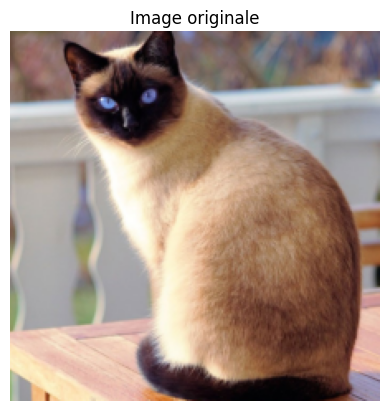

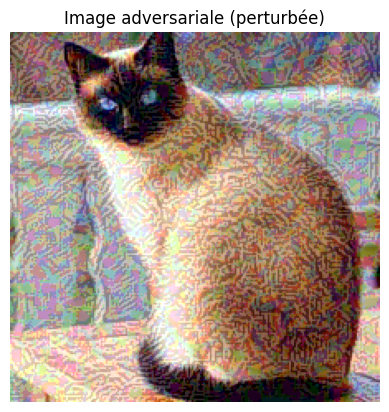

In [ ]:
# --- Visualisation des images originale et adversariale ---

def show_image(x_tensor, title=""):
    """
    x_tensor: tableau NumPy de forme [1, 3, 224, 224], valeurs dans [0,1].
    Affiche l'unique image de ce lot grâce à Matplotlib.
    """
    from torchvision.transforms.functional import to_pil_image
    img_torch = torch.from_numpy(x_tensor[0])
    pil_img = to_pil_image(img_torch)
    plt.imshow(pil_img)
    plt.title(title)
    plt.axis("off")
    plt.show()

# Affichage
show_image(x, title="Image originale")
show_image(x_adv, title="Image adversariale (perturbée)")

Nous avons vu comment créer un exemple adversarial en utilisant l’attaque FGSM sur un AlexNet pré-entraîné.

L’image originale (un chat siamois) est parfois correctement identifiée (comme “Siamese cat”) ou proche (par exemple “Egyptian cat”).

Après l’attaque, il peut arriver que le réseau prédise une classe totalement différente, par exemple “wood rabbit” ou autre. Cela montre la vulnérabilité des réseaux de neurones aux attaques par perturbation minimale.